## Task_1 : Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Now, let's import the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Internship Projects/Prodigy Tasks/Task 1/Housing.csv')

## Data visualization

### Distribution of the target variable (price)

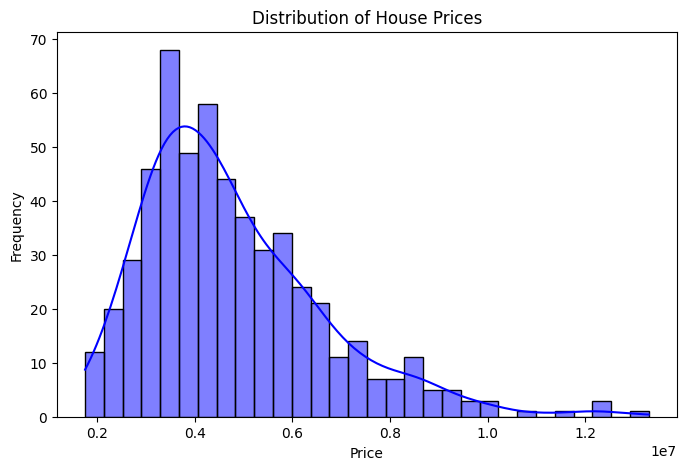

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Scaling the features

In [5]:
columns_to_scale = ['area', 'bedrooms', 'bathrooms']

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

### Selecting relevant features like square footage ('area') , number of bedrooms ('bedrooms') , number of bathrooms ('bathrooms') and our target variable for house prices is 'price'

In [8]:
X = df[['area', 'bedrooms', 'bathrooms']]      # features or input variables
y = df['price']       # target variable

#### Now, we have to do train-test split i.e. dividing the data into training(80%) set and testing(20%) set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

#### Training the model

In [11]:
Lr.fit(X_train, y_train)

LinearRegression()

### Make predictions on the test set


In [12]:
y_pred = Lr.predict(X_test)

## Evaluating the model




In [13]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Root Mean Squared Error (RMSE): 1658324.6001036866
R-squared (R²): 0.4559299118872445


#### Displaying the model's coefficients

Displaying the importance of each feature (area, bedrooms, bathrooms) in the prediction.

In [14]:
features = ['area', 'bedrooms', 'bathrooms']
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': Lr.coef_})
print(coefficients)

     Feature   Coefficient
0       area  5.026539e+06
1   bedrooms  1.800988e+06
2  bathrooms  4.266959e+06


## Visualization of Actual vs Predicted Prices

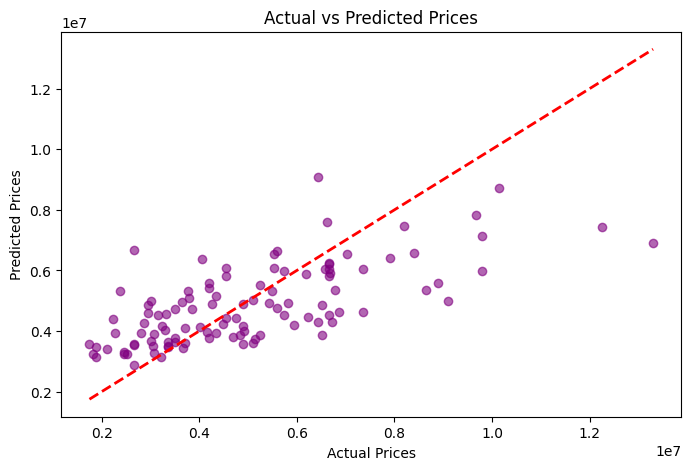

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()